In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Alfa de Crombach

\begin{equation}
    \alpha = \frac{k}{k-1}
    \left(1-{\dfrac{\sum_{i=1}^{k}S_{i}^{2}}{S_{t}^{2}}}\right)
\end{equation}

* $S_{i}^{2}$ es la varianza del ítem $i$.
* $S_{t}^{2}$ es la varianza de los valores totales observados.
* k es el número de preguntas o ítems.

In [2]:
def alfa_de_crombach(preguntas, puntajes):
    N = preguntas.shape[0]
    varianzas_preguntas = preguntas.var(axis=0)
    varianza_puntaje = puntajes.var(axis=0)
    varianza_total = varianzas_preguntas.sum(axis=0)
    return N / (N - 1) * (1 - varianza_total / varianza_puntaje)

In [15]:
def analysis(data, disc):
    columnas_preguntas = ['P' + str(i) for i in range(1, 13)]
    preguntas = data[columnas_preguntas + ['Nota']] # Seleccionar solo preguntas
    preguntas = preguntas.fillna(0) # Reemplazar los valores nulos con 0
    correctas = preguntas.sum(axis=0) # Correctas por pregunta
    N = preguntas.shape[0] # Total de datos
    preguntas_ordenadas = preguntas.sort_values('Nota') # Ordenar datos por nota
    peores = preguntas_ordenadas.iloc[:disc][columnas_preguntas] # Obtener los peores resultados
    mejores = preguntas_ordenadas.iloc[-disc:][columnas_preguntas] # Obtener los mejores resultados
    discriminacion = mejores.mean(axis=0) - peores.mean(axis=0)
    dificultad = correctas[columnas_preguntas] / N
    dd = np.vstack([correctas[columnas_preguntas], dificultad, discriminacion])
    return pd.DataFrame(dd, columns=list(discriminacion.index), index=['Correctas', 'Dificultad', 'Discriminación'])

In [4]:
def correlation_matrix(corr_matrix):
    cols = corr_matrix.columns
    plt.figure(figsize=(10, 10),)
    plt.matshow(corr_matrix, fignum=1)
    plt.xticks(range(len(cols)), cols, rotation='vertical', fontsize=14)
    plt.yticks(range(len(cols)), cols, fontsize=14)
    plt.colorbar()
    plt.show()

# Lectura de datos

In [5]:
DATA_DIR = './data/'
results_2023_1 = DATA_DIR + '2023-1.csv'
results_2023_2 = DATA_DIR + '2023-2.csv'

In [6]:
data_2023_1 = pd.read_csv(results_2023_1)
data_2023_2 = pd.read_csv(results_2023_2)
data_2023_1['Duración'] = pd.to_timedelta(data_2023_1['Duración']).dt.total_seconds() # Duración a segundos
data_2023_2['Duración'] = pd.to_timedelta(data_2023_2['Duración']).dt.total_seconds() # Duración a segundos

## Descripción datos 2023-1

In [7]:
data_2023_1.describe()

,Duración,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,Puntaje Matemática M1,Puntaje Matemática M2,Certamen 1,Abstracción,Descomposición,Patrones,Algoritmos,Aprobación C1,Nota Final,Aprobación Asignatura
count,980.000000,967.000000,967.000000,963.000000,922.000000,948.000000,941.000000,923.000000,920.000000,875.000000,...,865.000000,865.000000,853.000000,980.000000,980.000000,980.000000,980.000000,980.000000,979.000000,979.000000
mean,2794.530612,0.374354,0.594623,0.566978,0.327549,0.626582,0.399575,0.856988,0.728261,0.549714,...,745.510983,520.126012,47.841735,55.238095,61.768707,56.054422,54.370748,0.414286,50.856997,0.560776
std,642.480100,0.484206,0.491219,0.495751,0.469574,0.483967,0.490071,0.350275,0.445098,0.497807,...,150.446897,127.119928,31.167720,30.854365,33.904551,30.220117,29.856099,0.492850,33.174139,0.496546
min,60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2400.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,631.000000,430.000000,18.000000,33.333333,33.333333,33.333333,33.333333,0.000000,14.000000,0.000000
50%,2820.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,...,769.000000,516.000000,51.000000,66.666667,66.666667,66.666667,50.000000,0.000000,65.000000,1.000000
75%,3300.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,862.000000,596.000000,76.000000,66.666667,100.000000,66.666667,66.666667,1.000000,79.000000,1.000000
max,4080.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1000.000000,903.000000,100.000000,100.000000,100.000000,100.000000,100.000000,1.000000,100.000000,1.000000


## Descripción datos 2023-2

In [8]:
data_2023_2.describe()

,Duración,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,Respondidas,Puntaje,Nota
count,912.000000,910.000000,910.000000,907.000000,886.000000,905.000000,907.000000,900.000000,904.000000,889.000000,898.000000,901.000000,898.000000,912.0,912.000000,912.000000
mean,4521.250000,0.546154,0.482418,0.640573,0.264108,0.665193,0.421169,0.852222,0.723451,0.587177,0.767261,0.786903,0.544543,12.0,7.198465,59.987215
std,18589.582927,0.498139,0.499966,0.480097,0.441106,0.472184,0.494019,0.355077,0.447539,0.492619,0.422813,0.409723,0.498289,0.0,2.512554,20.937954
min,1080.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.0,1.000000,8.330000
25%,2100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,12.0,5.000000,41.670000
50%,2400.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,12.0,7.000000,58.330000
75%,2700.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,12.0,9.000000,75.000000
max,192540.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,12.0,12.000000,100.000000


# Matriz de correlación

In [9]:
cm_2023_1 = data_2023_1.corr()
cm_2023_2 = data_2023_2.corr()

## 2023-1

In [10]:
cm_2023_1

,Duración,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,Puntaje Matemática M1,Puntaje Matemática M2,Certamen 1,Abstracción,Descomposición,Patrones,Algoritmos,Aprobación C1,Nota Final,Aprobación Asignatura
Duración,1.000000,0.020747,0.183100,0.105137,0.131173,0.076552,0.022700,0.111589,0.152645,0.038305,...,0.170764,0.151586,0.047056,0.148644,0.252174,0.162200,0.227279,0.134390,0.129830,0.121283
P1,0.020747,1.000000,-0.010303,0.029045,0.036301,0.082275,0.006891,-0.036230,0.039900,0.075570,...,0.068378,0.064089,0.084766,0.595907,-0.004668,0.035032,0.038282,0.064556,0.063014,0.039917
P2,0.183100,-0.010303,1.000000,0.223683,0.276366,0.205565,0.137076,0.119175,0.123709,0.210714,...,0.377503,0.336354,0.345470,0.212118,0.242973,0.253440,0.769701,0.278262,0.350057,0.298454
P3,0.105137,0.029045,0.223683,1.000000,0.138178,0.129278,0.098641,0.139192,0.076955,0.161094,...,0.241874,0.266306,0.223058,0.144796,0.189547,0.207351,0.522067,0.190856,0.206263,0.179288
P4,0.131173,0.036301,0.276366,0.138178,1.000000,0.197980,0.156067,0.122831,0.123206,0.137772,...,0.288502,0.273250,0.305748,0.207425,0.231064,0.231753,0.723175,0.242670,0.224623,0.173754
P5,0.076552,0.082275,0.205565,0.129278,0.197980,1.000000,0.083126,0.122735,0.110884,0.199074,...,0.357373,0.283334,0.231695,0.666463,0.215250,0.219061,0.261835,0.203487,0.241803,0.222831
P6,0.022700,0.006891,0.137076,0.098641,0.156067,0.083126,1.000000,0.055670,0.087998,0.084320,...,0.141504,0.128743,0.150509,0.070605,0.092622,0.637610,0.195484,0.082353,0.137947,0.143001
P7,0.111589,-0.036230,0.119175,0.139192,0.122831,0.122735,0.055670,1.000000,0.109770,0.128935,...,0.187792,0.144709,0.149688,0.095521,0.123749,0.522350,0.183642,0.118222,0.149897,0.113861
P8,0.152645,0.039900,0.123709,0.076955,0.123206,0.110884,0.087998,0.109770,1.000000,0.204278,...,0.251344,0.181359,0.148780,0.154249,0.628225,0.216711,0.170668,0.150000,0.167659,0.174099
P9,0.038305,0.075570,0.210714,0.161094,0.137772,0.199074,0.084320,0.128935,0.204278,1.000000,...,0.263690,0.230939,0.187723,0.220816,0.229866,0.687526,0.246795,0.158459,0.184812,0.173812


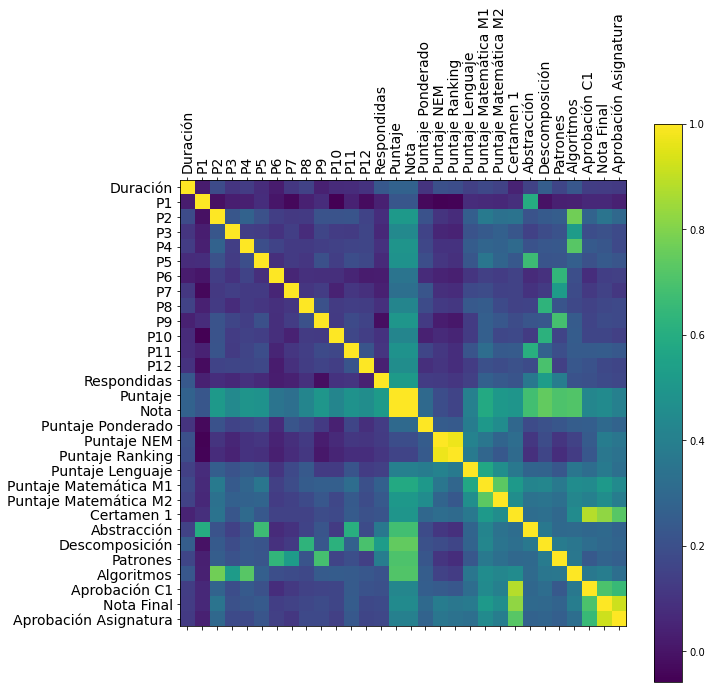

In [11]:
correlation_matrix(cm_2023_1)

## 2023-2

In [12]:
cm_2023_2

,Duración,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,Respondidas,Puntaje,Nota
Duración,1.000000,0.029141,0.012358,-0.006523,-0.006207,0.025220,0.025525,-0.020682,-0.036665,0.015778,-0.028683,-0.031303,0.050662,NaN,-0.088120,-0.088116
P1,0.029141,1.000000,0.147046,0.118937,0.110013,0.080233,0.078559,0.045319,0.017638,0.077453,0.075831,0.089567,0.021412,NaN,0.351514,0.351515
P2,0.012358,0.147046,1.000000,0.245621,0.312427,0.211182,0.122935,0.098484,0.127341,0.169886,0.103739,0.147448,0.098762,NaN,0.517221,0.517224
P3,-0.006523,0.118937,0.245621,1.000000,0.192775,0.214716,0.158388,0.085212,0.152479,0.098860,0.095554,0.208388,0.164512,NaN,0.510344,0.510343
P4,-0.006207,0.110013,0.312427,0.192775,1.000000,0.178961,0.155787,0.081233,0.091382,0.160332,0.094066,0.135335,0.106330,NaN,0.473334,0.473336
P5,0.025220,0.080233,0.211182,0.214716,0.178961,1.000000,0.120290,0.132379,0.124828,0.181709,0.161695,0.136540,0.137682,NaN,0.496396,0.496401
P6,0.025525,0.078559,0.122935,0.158388,0.155787,0.120290,1.000000,0.088648,0.094927,0.117461,0.152702,0.146052,0.091940,NaN,0.440221,0.440224
P7,-0.020682,0.045319,0.098484,0.085212,0.081233,0.132379,0.088648,1.000000,0.138446,0.120878,0.079525,0.103072,0.152752,NaN,0.359646,0.359653
P8,-0.036665,0.017638,0.127341,0.152479,0.091382,0.124828,0.094927,0.138446,1.000000,0.120832,0.062043,0.193575,0.182775,NaN,0.424960,0.424956
P9,0.015778,0.077453,0.169886,0.098860,0.160332,0.181709,0.117461,0.120878,0.120832,1.000000,0.112509,0.188334,0.089229,NaN,0.456500,0.456496


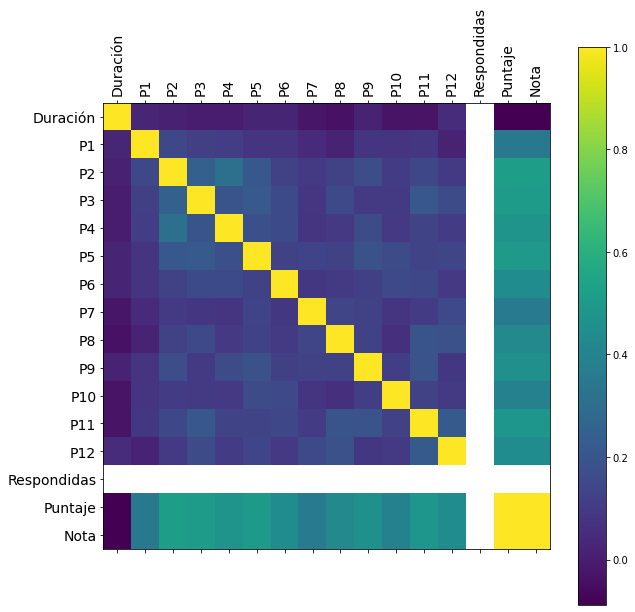

In [13]:
correlation_matrix(cm_2023_2)

# Análisis

## 2023-1

In [16]:
analysis(data_2023_1, 266)

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12
Correctas,362.000000,575.000000,546.000000,302.000000,594.000000,376.000000,791.000000,670.000000,481.000000,658.000000,668.000000,488.000000
Dificultad,0.369388,0.586735,0.557143,0.308163,0.606122,0.383673,0.807143,0.683673,0.490816,0.671429,0.681633,0.497959
Discriminación,0.259398,0.669173,0.601504,0.578947,0.590226,0.428571,0.421053,0.548872,0.695489,0.624060,0.661654,0.669173


Todas las preguntas

In [17]:
alfa_de_crombach(data_2023_1[['P' + str(i) for i in range(1, 13)]], data_2023_1['Puntaje'])

0.6542845520094771

Sin pregunta 1

In [19]:
alfa_de_crombach(data_2023_1[['P' + str(i) for i in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]]], data_2023_1['Puntaje'])

0.6855848274911994

Sin pregunta 4

In [20]:
alfa_de_crombach(data_2023_1[['P' + str(i) for i in [1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12]]], data_2023_1['Puntaje'])

0.6837217111980582

Sin pregunta 7

In [21]:
alfa_de_crombach(data_2023_1[['P' + str(i) for i in [1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12]]], data_2023_1['Puntaje'])

0.6706642393595253

## 2023-2

In [22]:
analysis(data_2023_2, int(round(910*0.27)))

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12
Correctas,497.000000,439.000000,581.000000,234.000000,602.000000,382.000000,767.000000,654.000000,522.000000,689.000000,709.000000,489.000000
Dificultad,0.544956,0.481360,0.637061,0.256579,0.660088,0.418860,0.841009,0.717105,0.572368,0.755482,0.777412,0.536184
Discriminación,0.418699,0.642276,0.642276,0.508130,0.556911,0.512195,0.321138,0.495935,0.601626,0.422764,0.516260,0.556911


In [24]:
alfa_de_crombach(data_2023_2[['P' + str(i) for i in range(1, 13)]], data_2023_2['Puntaje'])

0.596060345666806